## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  60.050041   908.412137  0.536766  3.488251  1.527923
1  35.792711   501.733914  0.335142  2.615394  1.416607
2  97.400402   982.339328  0.579598  9.558572  1.481964
3  17.777773  1234.851117  0.248378  5.653008  1.541566
4  11.709362  1338.521200  0.419504  7.578899  1.470214


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0788057	total: 68.6ms	remaining: 1m 8s
1:	learn: 1.0682482	total: 69.2ms	remaining: 34.5s
2:	learn: 1.0591172	total: 69.8ms	remaining: 23.2s
3:	learn: 1.0470034	total: 70.3ms	remaining: 17.5s
4:	learn: 1.0378611	total: 70.8ms	remaining: 14.1s
5:	learn: 1.0278700	total: 71.3ms	remaining: 11.8s
6:	learn: 1.0179948	total: 71.9ms	remaining: 10.2s
7:	learn: 1.0075263	total: 72.4ms	remaining: 8.98s
8:	learn: 0.9972926	total: 72.9ms	remaining: 8.02s
9:	learn: 0.9858025	total: 73.4ms	remaining: 7.26s
10:	learn: 0.9778771	total: 73.9ms	remaining: 6.65s
11:	learn: 0.9678052	total: 74.4ms	remaining: 6.12s
12:	learn: 0.9607525	total: 74.8ms	remaining: 5.68s
13:	learn: 0.9512134	total: 75.3ms	remaining: 5.3s
14:	learn: 0.9413888	total: 75.9ms	remaining: 4.98s
15:	learn: 0.9340096	total: 76.4ms	remaining: 4.7s
16:	learn: 0.9236984	total: 76.9ms	remaining: 4.45s
17:	learn: 0.9149713	total: 77.3ms	remaining: 4.22s
18:	learn: 0.9055507	total: 77.8ms	remaining: 

87:	learn: 0.5073388	total: 109ms	remaining: 1.13s
88:	learn: 0.5033866	total: 109ms	remaining: 1.12s
89:	learn: 0.4995105	total: 110ms	remaining: 1.11s
90:	learn: 0.4968560	total: 110ms	remaining: 1.1s
91:	learn: 0.4929183	total: 111ms	remaining: 1.09s
92:	learn: 0.4886676	total: 111ms	remaining: 1.08s
93:	learn: 0.4849990	total: 112ms	remaining: 1.08s
94:	learn: 0.4804747	total: 112ms	remaining: 1.07s
95:	learn: 0.4780828	total: 113ms	remaining: 1.06s
96:	learn: 0.4744785	total: 113ms	remaining: 1.05s
97:	learn: 0.4717680	total: 114ms	remaining: 1.04s
98:	learn: 0.4689264	total: 114ms	remaining: 1.04s
99:	learn: 0.4659783	total: 115ms	remaining: 1.03s
100:	learn: 0.4628190	total: 115ms	remaining: 1.02s
101:	learn: 0.4587454	total: 116ms	remaining: 1.02s
102:	learn: 0.4558692	total: 116ms	remaining: 1.01s
103:	learn: 0.4533073	total: 117ms	remaining: 1s
104:	learn: 0.4499675	total: 117ms	remaining: 997ms
105:	learn: 0.4468792	total: 118ms	remaining: 991ms
106:	learn: 0.4443229	total: 

261:	learn: 0.1997319	total: 187ms	remaining: 527ms
262:	learn: 0.1991884	total: 187ms	remaining: 525ms
263:	learn: 0.1982386	total: 188ms	remaining: 524ms
264:	learn: 0.1978387	total: 188ms	remaining: 522ms
265:	learn: 0.1968983	total: 189ms	remaining: 520ms
266:	learn: 0.1965097	total: 189ms	remaining: 519ms
267:	learn: 0.1958924	total: 190ms	remaining: 518ms
268:	learn: 0.1954412	total: 190ms	remaining: 516ms
269:	learn: 0.1950356	total: 190ms	remaining: 514ms
270:	learn: 0.1946589	total: 191ms	remaining: 512ms
271:	learn: 0.1937910	total: 191ms	remaining: 511ms
272:	learn: 0.1932855	total: 191ms	remaining: 510ms
273:	learn: 0.1928118	total: 192ms	remaining: 509ms
274:	learn: 0.1924094	total: 192ms	remaining: 507ms
275:	learn: 0.1918988	total: 193ms	remaining: 506ms
276:	learn: 0.1915766	total: 193ms	remaining: 505ms
277:	learn: 0.1912367	total: 194ms	remaining: 504ms
278:	learn: 0.1907652	total: 194ms	remaining: 502ms
279:	learn: 0.1902907	total: 195ms	remaining: 501ms
280:	learn: 

492:	learn: 0.0979339	total: 291ms	remaining: 299ms
493:	learn: 0.0975760	total: 291ms	remaining: 298ms
494:	learn: 0.0973384	total: 292ms	remaining: 298ms
495:	learn: 0.0971064	total: 293ms	remaining: 297ms
496:	learn: 0.0967356	total: 293ms	remaining: 297ms
497:	learn: 0.0965098	total: 294ms	remaining: 296ms
498:	learn: 0.0961100	total: 294ms	remaining: 295ms
499:	learn: 0.0958896	total: 294ms	remaining: 294ms
500:	learn: 0.0955492	total: 295ms	remaining: 294ms
501:	learn: 0.0951630	total: 296ms	remaining: 293ms
502:	learn: 0.0949478	total: 296ms	remaining: 292ms
503:	learn: 0.0945508	total: 296ms	remaining: 292ms
504:	learn: 0.0943404	total: 297ms	remaining: 291ms
505:	learn: 0.0939523	total: 297ms	remaining: 290ms
506:	learn: 0.0937311	total: 298ms	remaining: 289ms
507:	learn: 0.0936304	total: 298ms	remaining: 289ms
508:	learn: 0.0934059	total: 299ms	remaining: 288ms
509:	learn: 0.0931997	total: 299ms	remaining: 287ms
510:	learn: 0.0929852	total: 300ms	remaining: 287ms
511:	learn: 

664:	learn: 0.0587351	total: 369ms	remaining: 186ms
665:	learn: 0.0585062	total: 370ms	remaining: 186ms
666:	learn: 0.0583086	total: 370ms	remaining: 185ms
667:	learn: 0.0582646	total: 371ms	remaining: 184ms
668:	learn: 0.0582087	total: 372ms	remaining: 184ms
669:	learn: 0.0579828	total: 372ms	remaining: 183ms
670:	learn: 0.0577753	total: 372ms	remaining: 183ms
671:	learn: 0.0575965	total: 373ms	remaining: 182ms
672:	learn: 0.0573405	total: 373ms	remaining: 181ms
673:	learn: 0.0571368	total: 374ms	remaining: 181ms
674:	learn: 0.0569179	total: 374ms	remaining: 180ms
675:	learn: 0.0566386	total: 375ms	remaining: 180ms
676:	learn: 0.0564407	total: 375ms	remaining: 179ms
677:	learn: 0.0562282	total: 376ms	remaining: 178ms
678:	learn: 0.0560273	total: 376ms	remaining: 178ms
679:	learn: 0.0558299	total: 377ms	remaining: 177ms
680:	learn: 0.0556198	total: 377ms	remaining: 177ms
681:	learn: 0.0554149	total: 378ms	remaining: 176ms
682:	learn: 0.0553623	total: 378ms	remaining: 175ms
683:	learn: 

902:	learn: 0.0308643	total: 473ms	remaining: 50.8ms
903:	learn: 0.0307692	total: 474ms	remaining: 50.3ms
904:	learn: 0.0306976	total: 474ms	remaining: 49.8ms
905:	learn: 0.0306276	total: 475ms	remaining: 49.2ms
906:	learn: 0.0305576	total: 475ms	remaining: 48.7ms
907:	learn: 0.0304888	total: 475ms	remaining: 48.2ms
908:	learn: 0.0304368	total: 476ms	remaining: 47.6ms
909:	learn: 0.0303690	total: 476ms	remaining: 47.1ms
910:	learn: 0.0303517	total: 477ms	remaining: 46.6ms
911:	learn: 0.0303003	total: 477ms	remaining: 46.1ms
912:	learn: 0.0302336	total: 478ms	remaining: 45.5ms
913:	learn: 0.0301566	total: 478ms	remaining: 45ms
914:	learn: 0.0301208	total: 479ms	remaining: 44.5ms
915:	learn: 0.0300454	total: 479ms	remaining: 43.9ms
916:	learn: 0.0299734	total: 480ms	remaining: 43.4ms
917:	learn: 0.0299064	total: 480ms	remaining: 42.9ms
918:	learn: 0.0298407	total: 480ms	remaining: 42.3ms
919:	learn: 0.0297760	total: 481ms	remaining: 41.8ms
920:	learn: 0.0297254	total: 481ms	remaining: 41

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

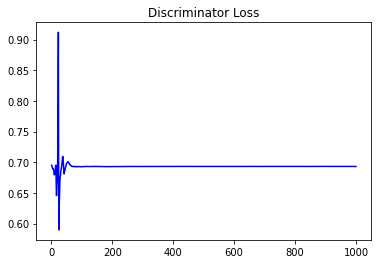

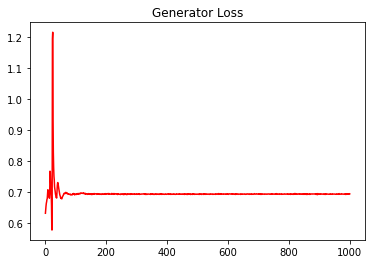

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0566805381709394


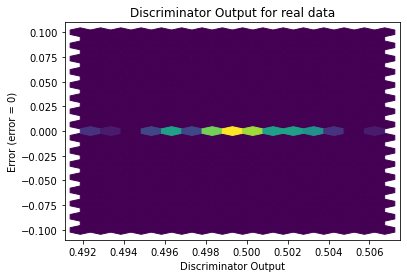

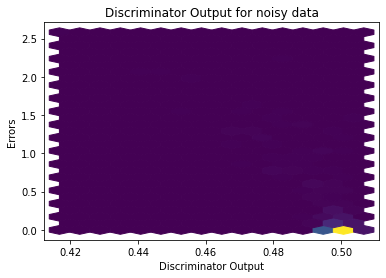

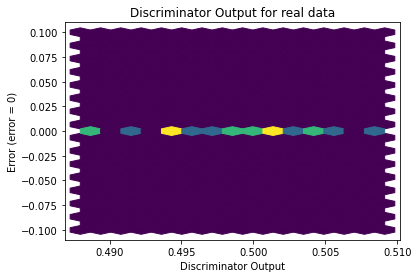

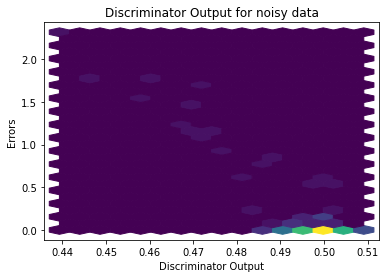

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


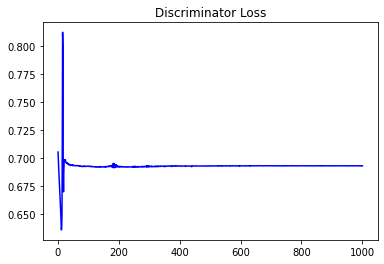

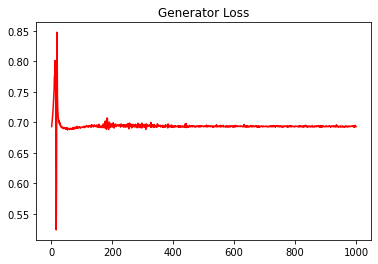

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.06984183318354725


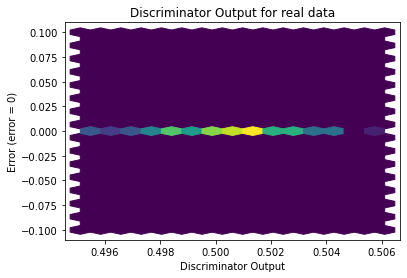

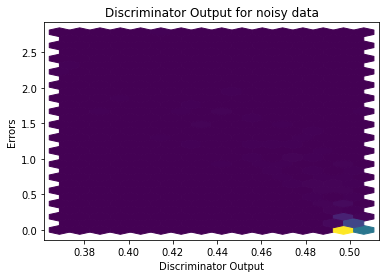

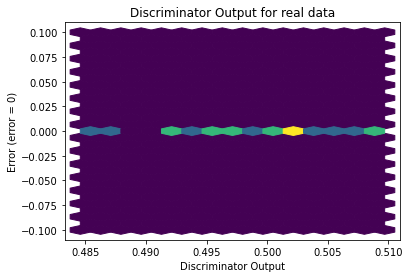

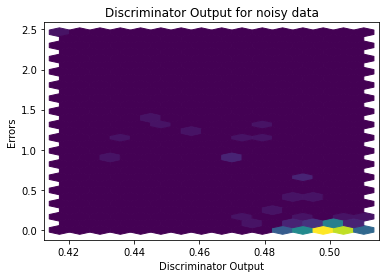

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0845]], requires_grad=True)
